# Groundwater Flow to Wells - IV

## Well Interference (pp. 212-213)

Well interference is the situation where the effect of one well impacts a nearby well, it is a particular kind of superposition.

### Superposition (pp. 213-216) 

A technique of adding solutions (perhaps adjusted in space and time) to mimic response of complex systems as an array of simple systems.

![](superp1.png)

![](superp2.png)

![](superp3.png)

![](superp4.png)

![](superp5.png)

![](superp6.png)

In [12]:
# Build a simulator in class.

In [13]:
def W(u): # Theis well function using exponential integral
    import scipy.special as sc
    w = sc.expn(1,u)
    return(w)

def s(radius,time,storage,transmissivity,discharge): # Drawdown function using exponential integral
    import math
    u = ((radius**2)*(storage))/(4*transmissivity*time)
    s = ((discharge)/(4*math.pi*transmissivity))*W(u)
    return(s)

Time(days)|Radius(m)|Drawdown(m)|
        30|         5|       68.38|
        30|        50|       31.81|
        30|       100|       21.02|
        30|       200|       10.94|
        30|       300|        5.94|
        30|       600|        0.80|
        30|       900|        0.06|
        30|      1200|        0.00|


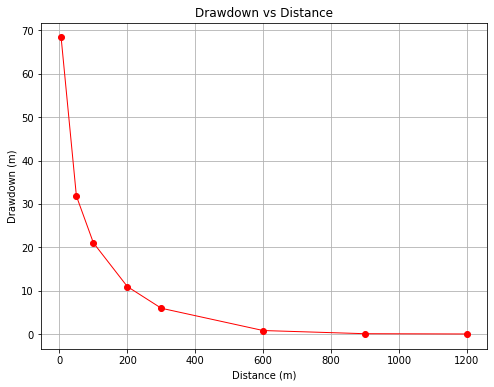

In [15]:
def W(u): # Theis well function using exponential integral
    import scipy.special as sc
    w = sc.expn(1,u)
    return(w)

def s(radius,time,storage,transmissivity,discharge): # Drawdown function using exponential integral
    import math
    u = ((radius**2)*(storage))/(4*transmissivity*time)
    s = ((discharge)/(4*math.pi*transmissivity))*W(u)
    return(s)

tt=30.0
data = \
[[tt,5],
[tt ,50],
[tt ,100],
[tt ,200],
[tt ,300],
[tt ,600],
[tt ,900],
[tt ,1200]]

modata = \
[[tt,5],
[tt ,50],
[tt ,100],
[tt ,200],
[tt ,300],
[tt ,600],
[tt ,900],
[tt ,1200]]

S = 0.0005 # given
T = 1.0 #m^2/day given
Q = 100 #m^3/d given

ddn = [0 for i in range(len(data))]

time = [0 for i in range(len(data))]
distance = [0 for i in range(len(data))]
print("Time(days)|Radius(m)|Drawdown(m)|")
for irow in range(len(data)):
    time[irow]=data[irow][0]
    distance[irow]=data[irow][1]
    ddn[irow] = s(distance[irow],time[irow],S,T,Q)
    print("%10i|%10i|%12.2f|"%(time[irow],distance[irow],round(ddn[irow],2)))

# import the package
from matplotlib import pyplot as plt
mydata = plt.figure(figsize = (8,6)) # build a drawing canvass from figure class; aspect ratio 4x3
plt.plot(distance, ddn, c='red', marker='o',linewidth=1) # basic line plot
#plt.invert_yaxis()
#plt.xscale('log') # set x-axis to display a logarithmic scale #################
plt.xlabel('Distance (m)') # label the x-axis
plt.ylabel('Drawdown (m)') # label the y-axis, notice the LaTex markup
#plt.legend(['series1','series2...']) # legend for each series
plt.title('Drawdown vs Distance') # make a plot title
plt.grid() # display a grid
plt.show() # display the plot

## Recovery Tests (pp. 216-218)